In [1]:
import numpy as np
import pandas as pd
from pprint import pprint
import astropy
import vaex as vx
from matplotlib import pyplot as plt
from detanalysis import Analyzer
import qetpy as qp
from detprocess import Template
from detprocess import Noise

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Just to make sure you have the right files:
#template_array.npy
#helium_traces.npy
#psd.npy
#time_array_microseconds.npy
#helium_trace_info.npy
!ls


helium_trace_info.npy  psd.npy		   template_devlopment.ipynb
helium_traces.npy      template_array.npy  time_array_microseconds.npy


In [3]:
!pwd

/home/pratyush06853/QETpy/demos/Of_1x2


In [4]:
#lets load the templates, noise , and some helium data from Run 30 
template_array = np.load("template_array.npy")
traces = np.load("helium_traces.npy")
psd = np.load("psd.npy")
time_microseconds = np.load("time_array_microseconds.npy")
metadata= np.load("helium_trace_info.npy",allow_pickle=True)
fs= metadata[0]['sample_rate']

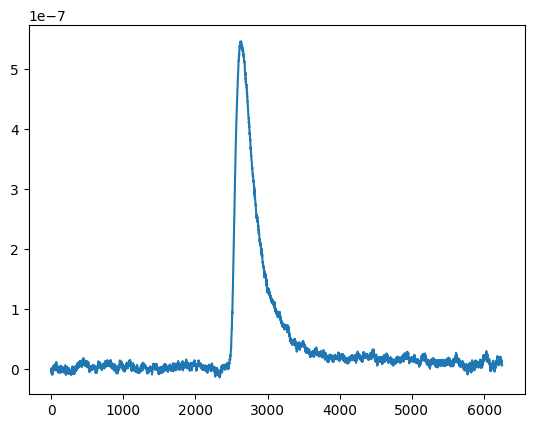

In [5]:
# lets plot a trace 
n=np.random.randint(0, traces.shape[0])
plt.plot(traces[n][0][:])

In [6]:
#We will use this function to instantiate the OF 1x2
def Call_optimal_Filter_object(template_1,template_1_tag, template_2, template_2_tag,  psd ,channel_name, fs, pretrigger_samples):
    # instantiate OF1x2
    return qp.OF1x2(of_base=None, template_1_tag=template_1_tag, template_1=template_1,
                template_2_tag=template_2_tag, template_2=template_2, psd=psd, sample_rate=fs,
                 pretrigger_samples=pretrigger_samples, channel_name= channel_name)
                



In [14]:
#OF_1x2 = Call_optimal_Filter_object(template_array,'Scintillation',template_array,'Evaporation',psd,'CPD', fs, 2500)

#This cell needs to be run after you get the scintillation and evaporation template 
# look for "Next Cells are for Showing how to get a evaporation or scintillation template " cells
OF_1x2 = Call_optimal_Filter_object(scintillation,'Scintillation',evaporation,'Evaporation',psd,'CPD', fs, 2500)

TypeError: __init__() got an unexpected keyword argument 'pretrigger_msec'

In [11]:
#next you can actually see the things that are computed even when signal is not passed to it; this will be done only once.
OF_1x2._of_base._templates_fft

{'Scintillation': array([ 2.34483600e-04+0.00000000e+00j, -2.12328540e-04-9.25567352e-05j,
         1.51199896e-04+1.64566485e-04j, ...,
        -6.56825217e-05+2.00707911e-04j,  1.51199896e-04-1.64566485e-04j,
        -2.12328540e-04+9.25567352e-05j]),
 'Evaporation': array([ 0.00052872+0.00000000e+00j, -0.00045185-1.76345334e-05j,
         0.00033578+1.06456144e-04j, ..., -0.000228  +1.74092375e-04j,
         0.00033578-1.06456144e-04j, -0.00045185+1.76345334e-05j])}

In [12]:
OF_1x2._of_base._norms

{'Scintillation': 5.6135568997093096e+16, 'Evaporation': 4.797228607559873e+16}

In [13]:
OF_1x2._of_base._phis

{'Scintillation': array([ 0.00000000e+00-0.00000000e+00j, -1.79845435e+16+7.83969331e+15j,
         1.79694874e+16-1.95580517e+16j, ...,
        -8.89922585e+15-2.71936124e+16j,  1.79694874e+16+1.95580517e+16j,
        -1.79845435e+16-7.83969331e+15j]),
 'Evaporation': array([ 0.00000000e+00-0.00000000e+00j, -3.82725924e+16+1.49367124e+15j,
         3.99060191e+16-1.26518760e+16j, ...,
        -3.08916727e+16-2.35875135e+16j,  3.99060191e+16+1.26518760e+16j,
        -3.82725924e+16-1.49367124e+15j])}

In [14]:
len(OF_1x2._of_base._templates)

2

In [15]:
OF_1x2._of_base._nbins

6250

In [16]:
OF_1x2._of_base._p_matrix

array([[[5.61355690e+16, 3.22331022e+16],
        [3.22331022e+16, 4.79722861e+16]],

       [[5.61355690e+16, 3.26256283e+16],
        [3.26256283e+16, 4.79722861e+16]],

       [[5.61355690e+16, 3.30146033e+16],
        [3.30146033e+16, 4.79722861e+16]],

       ...,

       [[5.61355690e+16, 3.10599197e+16],
        [3.10599197e+16, 4.79722861e+16]],

       [[5.61355690e+16, 3.14508916e+16],
        [3.14508916e+16, 4.79722861e+16]],

       [[5.61355690e+16, 3.18422128e+16],
        [3.18422128e+16, 4.79722861e+16]]])

In [17]:
for key in OF_1x2._of_base._templates:
    print(key)

Scintillation
Evaporation


In [18]:
OF_1x2._of_base._q_vector

{}

In [19]:
OF_1x2._of_base._signal_filts_td

{}

In [20]:
OF_1x2._of_base._norms

{'Scintillation': 5.6135568997093096e+16, 'Evaporation': 4.797228607559873e+16}

In [21]:
OF_1x2._of_base._chisq0 

In [22]:
##right now we have not supplied any signal to the OF filter yet ..so it would be empty 
OF_1x2._of_base._signal

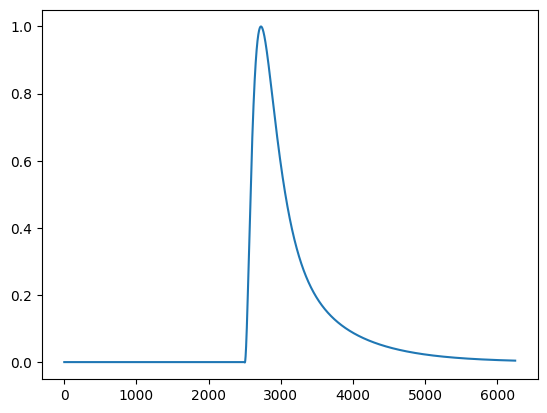

In [23]:
plt.plot(OF_1x2._of_base._templates[OF_1x2._template_2_tag])

In [79]:
#Next lets supply a signal or a trace 
n=np.random.randint(0, traces.shape[0])
#n=413
#n=454
OF_1x2.calc(signal = traces[n][0][:])

In [80]:
# Now you can see the signal 
OF_1x2._of_base._signal

array([-3.45588365e-09, -1.59589943e-09, -5.78108568e-09, ...,
        3.16543122e-08,  3.09567072e-08,  3.32823527e-08])

In [81]:
n

327

In [82]:
OF_1x2._time_diff_two_Pulses*fs

222.0

In [83]:
OF_1x2._of_base._signal

array([-3.45588365e-09, -1.59589943e-09, -5.78108568e-09, ...,
        3.16543122e-08,  3.09567072e-08,  3.32823527e-08])

In [84]:
(OF_1x2._time_first_pulse- OF_1x2._of_base.pretrigger_samples)*1e-3

-2.495

In [85]:
OF_1x2._time_second_pulse

227

In [86]:
OF_1x2._time_diff_two_Pulses*OF_1x2._of_base._fs

222.0

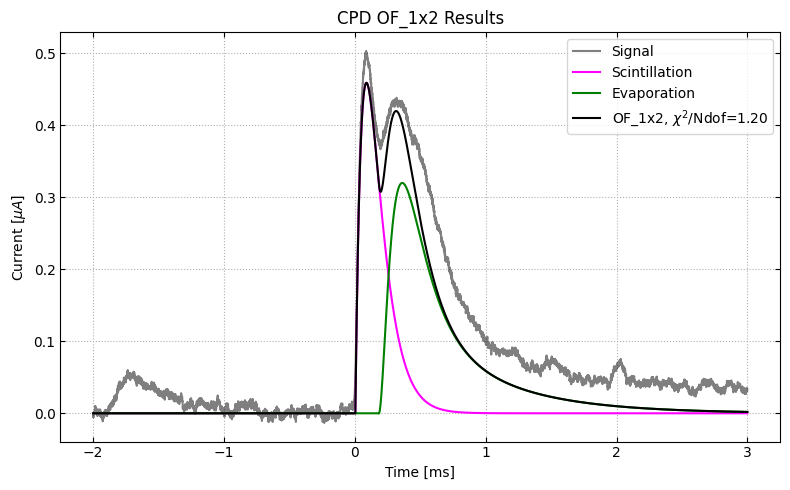

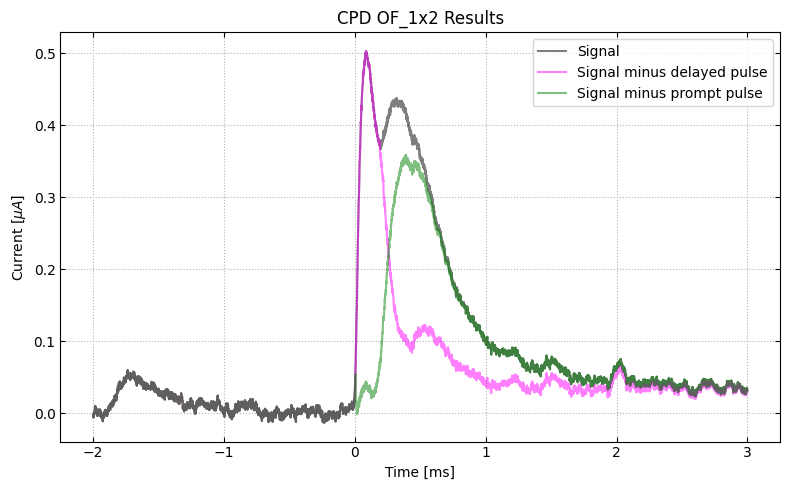

In [87]:
#lets plot 
OF_1x2.plot()
#plt.axvline(x=  OF_1x2._time_first_pulse *1e-3 )
#plt.axvline(x=  OF_1x2._time_second_pulse *1e-3 )

In [22]:
OF_1x2._of_base._fs

1250000.0

In [23]:
OF_1x2._of_base._df

200.0

Next Cells are for Showing how to get a evaporation or scintillation template 

In [8]:
import iminuit
from iminuit import Minuit
from iminuit.util import describe, make_func_code

class LeastSquares:
    """
    Generic least-squares cost function with error.
    """
    
    def __init__(self, model, x, y, err):
        self.model = model  # model predicts y for given x
        self.x = np.asarray(x)
        self.y = np.asarray(y)
        self.err = np.asarray(err)

    def __call__(self, *par):  # we accept a variable number of model parameters
        ym = self.model(self.x, *par)
        return np.sum(np.ma.masked_invalid((self.y - ym) ** 2 / self.err ** 2))

    
class BetterLeastSquares(LeastSquares):
    def __init__(self, model, x, y, err):
        super().__init__(model, x, y, err)
        self.func_code = make_func_code(describe(model)[1:])

class GenericChi2:
    def __init__(self, f, x, y,e=1.):
        self.f = f
        self.x = x; self.y=y; self.e=e
        args = iminuit.describe(f)#extract function signature
        self.func_code = iminuit.Struct(
          co_varnames = args[1:],#dock off independent param
          co_argcount = len(args)-1
        )
    def __call__(self, *arg):
        f = ( self.f(self.x,*arg)-self.y )/self.e
        b = np.ma.masked_invalid(f)
        return np.sum(b**2)


def three_pole_template(t, A, B, C, D, E, F, tau_f_11, tau_f_12, tau_f_13, tau_r_1, tau_f_21, tau_f_22, tau_f_23, tau_r_2):
    to = 0.20
    f1 = lambda t: 0
    f2 = lambda t: A*(np.exp(-t/tau_f_11)) + B*(np.exp(-t/tau_f_12)) + C*(np.exp(-t/tau_f_13)) -(A+B+C)*(np.exp(-t/tau_r_1))
    f3 = lambda t: A*(np.exp(-t/tau_f_11)) + B*(np.exp(-t/tau_f_12)) + C*(np.exp(-t/tau_f_13)) -(A+B+C)*(np.exp(-t/tau_r_1)) +\
                       D*(np.exp(-(t-to)/tau_f_21)) + E*(np.exp(-(t-to)/tau_f_22)) + F*(np.exp(-(t-to)/tau_f_23)) -(D+E+F)*(np.exp(-(t-to)/tau_r_2))
    return np.piecewise(t, [ t < 0, (t >= 0)* (t<to ), t >= to ], [f1, f2, f3])

In [9]:
#t=np.arange(-2,3,1/(1250))
t=np.arange(0,1,1/(1250))
n=10
fit = Minuit(BetterLeastSquares(three_pole_template, t, traces[n][0][2500:3750]/np.max(traces[n][0][2500:3750]), \
                                0.01*np.sqrt( traces[n][0][2500:3750])), \
             A = 1, B = 1, C = 1, D = 0.5, E = 1, F = 1,\
             tau_f_11 = 0.1, tau_f_12 = 0.1, tau_f_13 = 0.1, tau_r_1 = 0.1,\
             tau_f_21 = 0.1, tau_f_22 = 0.1, tau_f_23 = 0.1, tau_r_2 = 0.1 )

limit_A=(0.1,4)
limit_B=(0.1,4)
limit_C=(0.1,4)

limit_D=(0.1,4)
limit_E=(0.1,4)
limit_F=(0.1,4)

limit_tau_f_11=(.01,2)
limit_tau_f_12=(.01,2)
limit_tau_f_13=(.01,2)
limit_tau_r_1=(.004,2)

limit_tau_f_21=(.01,2)
limit_tau_f_22=(.01,4)
limit_tau_f_23=(.01,4)
limit_tau_r_2=(.004,2)

fit.limits= [limit_A,limit_B,limit_C,limit_D,limit_E,limit_F,\
                 limit_tau_f_11,limit_tau_f_12,limit_tau_f_13,limit_tau_r_1,limit_tau_f_21,limit_tau_f_22,limit_tau_f_23,limit_tau_r_2]
fit.errordef = Minuit.LEAST_SQUARES
print(fit.migrad())
# fit.migrad()
A_fit, B_fit, C_fit, tau_f_11_fit, tau_f_12_fit, tau_f_13_fit,tau_r_1_fit = fit.values[0], fit.values[1], fit.values[2], fit.values[6], fit.values[7], fit.values[8],fit.values[9]
D_fit, E_fit, F_fit, tau_f_21_fit, tau_f_22_fit, tau_f_23_fit,tau_r_2_fit = fit.values[3], fit.values[4], fit.values[5], fit.values[10], fit.values[11], fit.values[12],fit.values[13]

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 4.547e+10                  │             Nfcn = 3378              │
│ EDM = 2.31e+07 (Goal: 0.0002)    │            time = 0.5 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           ABOVE call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │        Covariance APPROXIMATE        │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬──

(-0.5, 1.0)

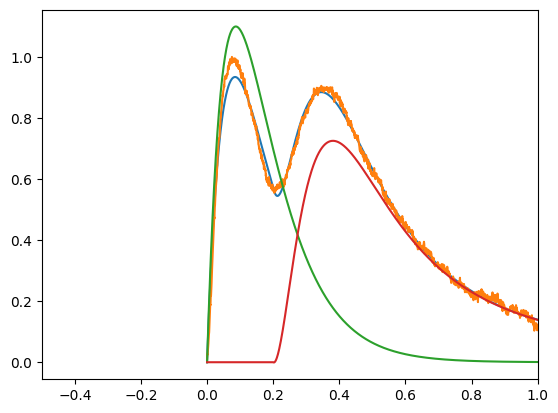

In [10]:
plt.plot(t, three_pole_template(t,A_fit, B_fit,C_fit, D_fit,E_fit,F_fit,          
                tau_f_11_fit, tau_f_12_fit,tau_f_13_fit, tau_r_1_fit, tau_f_21_fit, tau_f_22_fit, tau_f_23_fit, tau_r_2_fit)) 

plt.plot(t, traces[n][0][2500:3750]/np.max(traces[n][0][2500:3750]))

plt.plot(t, three_pole_template(t,A_fit, B_fit,C_fit,0, 0,0, tau_f_11_fit, tau_f_12_fit, tau_f_12_fit,tau_r_1_fit,\
                                tau_f_21_fit, tau_f_22_fit,tau_f_23_fit, tau_r_2_fit)) 
plt.plot(t, three_pole_template(t,0, 0, 0, D_fit, E_fit, F_fit, tau_f_11_fit, tau_f_12_fit,tau_f_12_fit, tau_r_1_fit,\
                                tau_f_21_fit, tau_f_22_fit,tau_f_23_fit, tau_r_2_fit)) 


plt.xlim([-0.5,1])

In [11]:
#Create the required Template

template_gen = Template(verbose=True)
#template_gen.create_template('CPD',A=1.1363486,B=3.9978556,
#                         	trace_length_msec=5, #msec
#                         	pretrigger_length_msec=2, #msec
#                         	sample_rate=1.25e6,
#                         	tau_r=66.68138e-6, #sec
#                         	tau_f1=140.57482e-6, #sec
#                        	tau_f2=104.26130e-6,tag='scintillation') #sec

#template_gen.create_template('CPD',A=3.845082 ,B=5.980859,
#                         	trace_length_msec=5, #msec
#                         	pretrigger_length_msec=2, #msec
#                         	sample_rate=1.25e6,
#                         	tau_r=107.32202e-6, #sec
#                         	tau_f1=78.94913e-6, #sec
#                       	tau_f2=155.83054e-6,tag='evaporation') #sec


template_gen.create_template('CPD', A = 585.9272e-3, B = 3.16003, C = 3.775152,
                         	trace_length_msec=5, #msec
                         	pretrigger_length_msec=2, #msec
                         	sample_rate=1.25e6,
                         	tau_r=71.37076e-6, #sec
                         	tau_f1=86.4547e-6, #sec
                        	tau_f2=108.40122e-6,
                            tau_f3=96.0609e-6,tag='scintillation') #sec

template_gen.create_template('CPD',A=2.568464 ,B=2.733735,C= 449.0937e-3,
                         	trace_length_msec=5, #msec
                         	pretrigger_length_msec=2, #msec
                         	sample_rate=1.25e6,
                         	tau_r=74.19435e-6, #sec
                         	tau_f1=163.4040e-6, #sec
                        	tau_f2=44.14561e-6,
                            tau_f3=604.8865e-6,tag='evaporation') #sec



INFO: Creating 4-poles template (tag="scintillation")
INFO: Creating 4-poles template (tag="evaporation")


In [12]:
#Save the template 
scintillation= template_gen.get_template(channel ='CPD', tag ='scintillation')[0]
#template_gen.get_template(channel ='CPD', tag ='scintillation')[0]
evaporation= template_gen.get_template(channel ='CPD', tag ='evaporation')[0]
#template_gen.get_template(channel ='CPD', tag ='evaporation')[0]

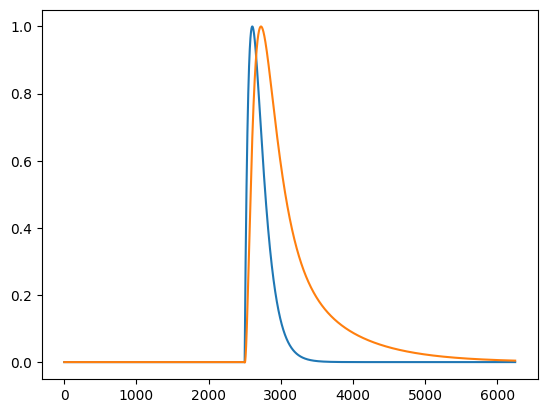

In [13]:
plt.plot(scintillation)
plt.plot(evaporation)